In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import spacy
import contractions
from nltk.corpus import stopwords
import cufflinks as cf
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

In [2]:
df = pd.read_csv("RedditNews.csv")

In [3]:
df.head()

,Date,News
0,7/1/2016,A 117-year-old woman in Mexico City finally re...
1,7/1/2016,IMF chief backs Athens as permanent Olympic host
2,7/1/2016,"The president of France says if Brexit won, so..."
3,7/1/2016,British Man Who Must Give Police 24 Hours' Not...
4,7/1/2016,100+ Nobel laureates urge Greenpeace to stop o...


In [4]:
df["News"][0]

'A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.'

In [5]:
data=df["News"]

In [6]:
data.replace(r'&amp;', '',regex=True,inplace=True) 

In [7]:
print(data)

0        A 117-year-old woman in Mexico City finally re...
1         IMF chief backs Athens as permanent Olympic host
2        The president of France says if Brexit won, so...
3        British Man Who Must Give Police 24 Hours' Not...
4        100+ Nobel laureates urge Greenpeace to stop o...
                               ...                        
73603    b'Man goes berzerk in Akihabara and stabs ever...
73604    b'Threat of world AIDS pandemic among heterose...
73605    b'Angst in Ankara: Turkey Steers into a Danger...
73606    b"UK: Identity cards 'could be used to spy on ...
73607    b'Marriage, they said, was reduced to the stat...
Name: News, Length: 73608, dtype: object


In [8]:
data.replace(r'0,0', '00', regex=True,inplace=True) 
data.replace(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', regex=True,inplace=True)
data.replace(r'\'', ' ', regex=True,inplace=True)
data.replace(r'\$', ' $ ', regex=True,inplace=True)
data.replace(r'u s ', ' united states ', regex=True,inplace=True)
data.replace(r'u n ', ' united nations ', regex=True,inplace=True)
data.replace(r'u k ', ' united kingdom ', regex=True,inplace=True)
data.replace(r'j k ', ' jk ', regex=True,inplace=True)
data.replace(r' s ', ' ', regex=True,inplace=True)
data.replace(r' yr ', ' year ', regex=True,inplace=True)
data.replace(r' l g b t ', ' lgbt ', regex=True,inplace=True)
data.replace(r'0km ', '0 km ', regex=True,inplace=True)

In [9]:
data

0        A 117 year old woman in Mexico City finally re...
1         IMF chief backs Athens as permanent Olympic host
2        The president of France says if Brexit won  so...
3        British Man Who Must Give Police 24 Hours  Not...
4        100  Nobel laureates urge Greenpeace to stop o...
                               ...                        
73603    b Man goes berzerk in Akihabara and stabs ever...
73604    b Threat of world AIDS pandemic among heterose...
73605    b Angst in Ankara  Turkey Steers into a Danger...
73606    b UK  Identity cards  could be used to spy on ...
73607    b Marriage  they said  was reduced to the stat...
Name: News, Length: 73608, dtype: object

In [10]:
text=[]

for ele in data:
    text.append(ele)

In [11]:
data[0]

'A 117 year old woman in Mexico City finally received her birth certificate  and died a few hours later  Trinidad Alvarez Lira had waited years for proof that she had been born in 1898 '

In [12]:
for i in range(len(text)):
    dat = contractions.fix(text[i])
    text[i]=dat

In [13]:
text[1:5]

['IMF chief backs Athens as permanent Olympic host',
 'The president of France says if Brexit won  so can Donald Trump',
 'British Man Who Must Give Police 24 Hours  Notice of Sex Threatens Hunger Strike  The man is the subject of a sexual risk order despite having never been convicted of a crime ',
 '100  Nobel laureates urge Greenpeace to stop opposing GMOs']

In [14]:
for i in range(len(text)):
    split = text[i].split()
    stops = set(stopwords.words("english"))
    final_words = [w for w in split if not w in stops]
    final_words = " ".join(final_words)
    text[i] = final_words

In [15]:
text[1:5]

['IMF chief backs Athens permanent Olympic host',
 'The president France says Brexit Donald Trump',
 'British Man Who Must Give Police 24 Hours Notice Sex Threatens Hunger Strike The man subject sexual risk order despite never convicted crime',
 '100 Nobel laureates urge Greenpeace stop opposing GMOs']

In [16]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [17]:
text[0]

'a 117 year old woman mexico city finally received birth certificate died hours later trinidad alvarez lira waited years proof born 1898'

In [18]:
dates = df["Date"]

In [19]:
datee=[]

for ele in dates:
    datee.append(ele)

In [20]:
# dictionary of lists 
dictio = {'Date': datee, 'News': text} 
    
dataframe = pd.DataFrame(dictio)
    
dataframe.head()

,Date,News
0,7/1/2016,a 117 year old woman mexico city finally recei...
1,7/1/2016,imf chief backs athens permanent olympic host
2,7/1/2016,the president france says brexit donald trump
3,7/1/2016,british man who must give police 24 hours noti...
4,7/1/2016,100 nobel laureates urge greenpeace stop oppos...


In [21]:
from wordcloud import WordCloud

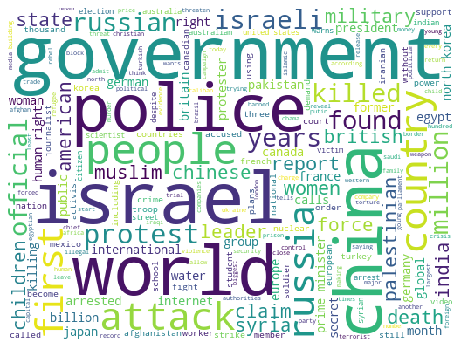

In [43]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384,
                    min_word_length = 5
                        ).generate("".join(dataframe["News"]))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [23]:
dataframe['news_len'] = dataframe['News'].astype(str).apply(len)

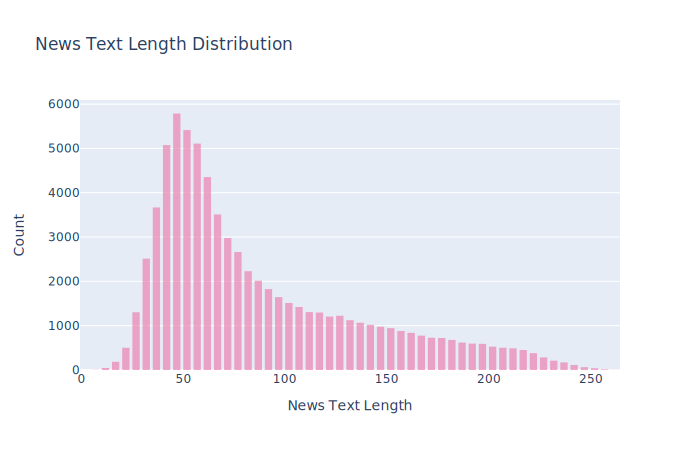

In [24]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=dataframe["news_len"],
    xbins=dict( # bins used for histogram
        size=5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.update_layout(
    title_text='News Text Length Distribution', # title of plot
    xaxis_title_text='News Text Length', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show("svg")

In [25]:
dataframe['word_count'] = dataframe['News'].apply(lambda x: len(str(x).split()))

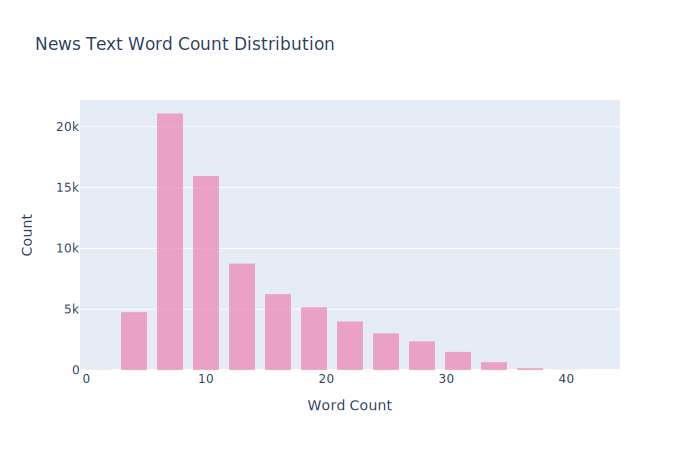

In [26]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=dataframe["word_count"],
    xbins=dict( # bins used for histogram
        size=3
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.update_layout(
    title_text='News Text Word Count Distribution', # title of plot
    xaxis_title_text='Word Count', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show("svg")

the 7166
us 4502
says 3660
new 3615
world 3294
china 3206
israel 3164
government 3055
police 3023
people 2875
year 2421
russia 2414
war 2403
iran 2186
years 2162
one 2136
uk 2117
president 2104
killed 1985
israeli 1920


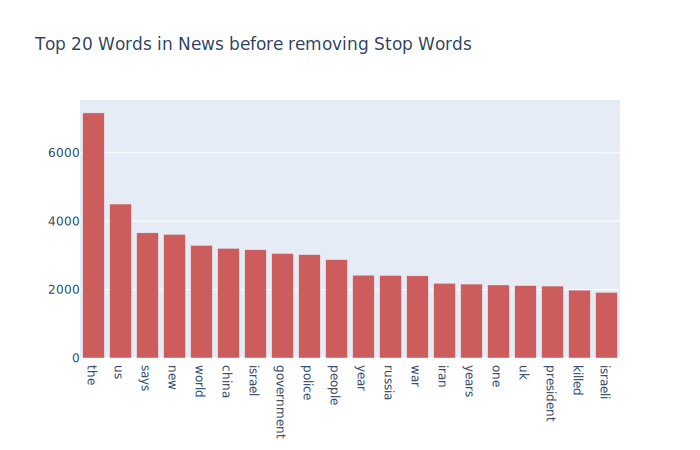

In [27]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df1['NewsText'], y=df1['count'],marker_color='indianred')
])
fig.update_layout(title_text='Top 20 Words in News before removing Stop Words')

fig.show("svg")

says 3660
new 3615
world 3294
china 3206
israel 3164
government 3055
police 3023
people 2875
year 2421
russia 2414
war 2403
iran 2186
years 2162
uk 2117
president 2104
killed 1985
israeli 1920
state 1850
north 1833
country 1787


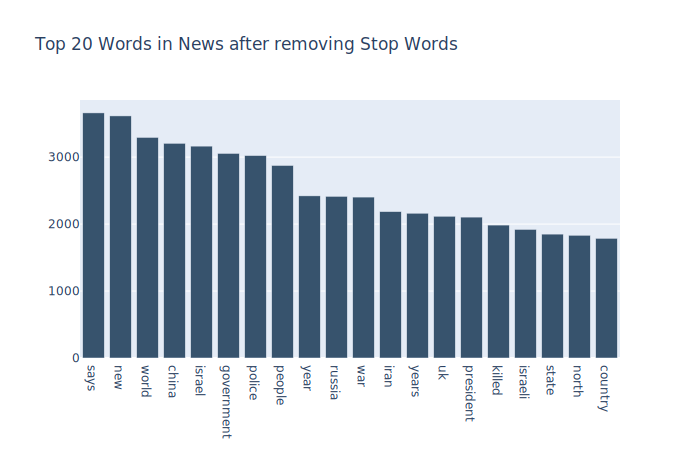

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df2['NewsText'], y=df2['count'],marker_color='rgb(55, 83, 109)')
])
fig.update_layout(title_text='Top 20 Words in News after removing Stop Words')

fig.show("svg")


north korea 1102
year old 996
prime minister 749
human rights 695
saudi arabia 583
united states 542
islamic state 438
bbc news 399
first time 376
south korea 349
climate change 324
west bank 321
new zealand 316
north korean 294
middle east 284
al qaeda 277
kim jong 258
at least 252
julian assange 242
war crimes 241


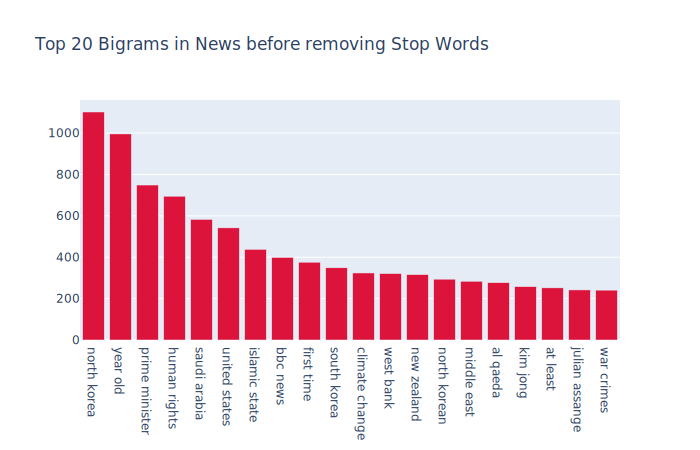

In [29]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df3['NewsText'], y=df3['count'],marker_color='crimson')
])
fig.update_layout(title_text='Top 20 Bigrams in News before removing Stop Words')

fig.show("svg")

north korea 1102
year old 996
prime minister 749
human rights 695
saudi arabia 583
united states 542
islamic state 438
bbc news 399
south korea 349
climate change 324
west bank 321
new zealand 316
north korean 294
middle east 284
al qaeda 277
kim jong 258
julian assange 242
war crimes 241
vladimir putin 238
hong kong 235


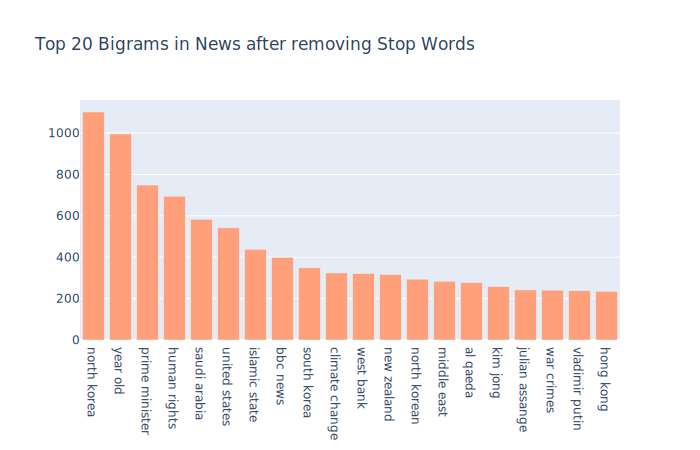

In [30]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df4['NewsText'], y=df4['count'],marker_color='lightsalmon')
])
fig.update_layout(title_text='Top 20 Bigrams in News after removing Stop Words')

fig.show("svg")

kim jong un 147
year old girl 133
kim jong il 88
osama bin laden 87
nobel peace prize 86
president vladimir putin 78
great barrier reef 75
human rights watch 75
world war ii 69
the united states 66
south china sea 66
president barack obama 65
bashar al assad 63
for first time 61
al jazeera english 61
year old boy 59
new york times 59
14 year old 55
the pirate bay 54
first time since 53


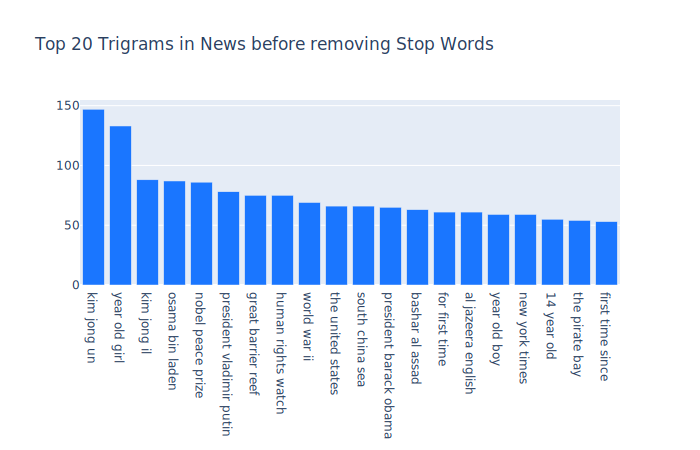

In [31]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df5['NewsText'], y=df5['count'],marker_color='rgb(26, 118, 255)')
])
fig.update_layout(title_text='Top 20 Trigrams in News before removing Stop Words')

fig.show("svg")


year old girl 133
kim jong il 88
osama bin laden 87
nobel peace prize 86
president vladimir putin 78
great barrier reef 75
human rights watch 75
world war ii 69
south china sea 66
president barack obama 65
bashar al assad 63
al jazeera english 61
year old boy 59
new york times 59
14 year old 55
nuclear power plant 52
000 year old 51
child sex abuse 51
female genital mutilation 50
16 year old 50


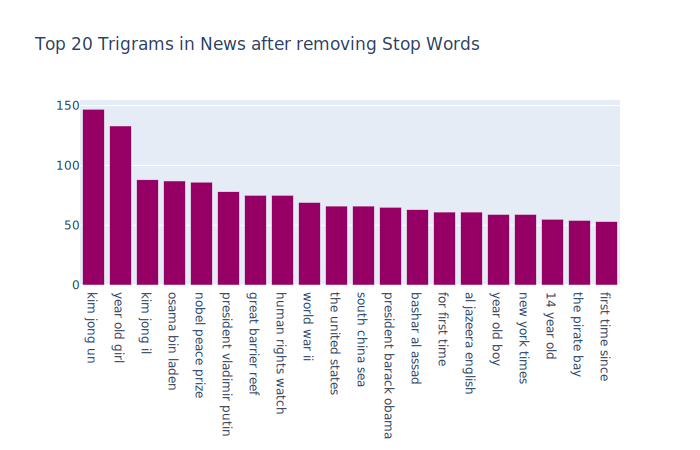

In [32]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(dataframe['News'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['NewsText' , 'count'])
fig = go.Figure(data=[
    go.Bar(x=df5['NewsText'], y=df5['count'],marker_color='rgb(150, 0, 100)')
])
fig.update_layout(title_text='Top 20 Trigrams in News after removing Stop Words')

fig.show("svg")


In [33]:
dataframe['count'] = dataframe.groupby("Date").transform('sum')['news_len']

In [34]:
dataframe.head()

,Date,News,news_len,word_count,count
0,7/1/2016,a 117 year old woman mexico city finally recei...,135,22,2510
1,7/1/2016,imf chief backs athens permanent olympic host,45,7,2510
2,7/1/2016,the president france says brexit donald trump,45,7,2510
3,7/1/2016,british man who must give police 24 hours noti...,140,23,2510
4,7/1/2016,100 nobel laureates urge greenpeace stop oppos...,54,8,2510


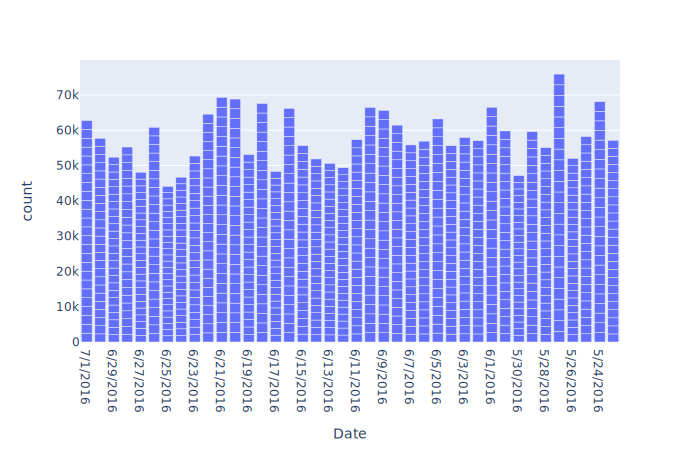

In [35]:
fig = px.bar(dataframe[0:1000], x='Date', y='count')
fig.show("svg")

In [36]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [37]:
dataframe['year']= dataframe['Date'].dt.year
dataframe['month']= dataframe['Date'].dt.month
dataframe['day']= dataframe['Date'].dt.day
dataframe.head()

,Date,News,news_len,word_count,count,year,month,day
0,2016-07-01,a 117 year old woman mexico city finally recei...,135,22,2510,2016,7,1
1,2016-07-01,imf chief backs athens permanent olympic host,45,7,2510,2016,7,1
2,2016-07-01,the president france says brexit donald trump,45,7,2510,2016,7,1
3,2016-07-01,british man who must give police 24 hours noti...,140,23,2510,2016,7,1
4,2016-07-01,100 nobel laureates urge greenpeace stop oppos...,54,8,2510,2016,7,1


In [38]:
dataframe['year_count'] = dataframe.groupby("year").transform('sum')['news_len']

In [39]:
dataframe.head()

,Date,News,news_len,word_count,count,year,month,day,year_count
0,2016-07-01,a 117 year old woman mexico city finally recei...,135,22,2510,2016,7,1,401130
1,2016-07-01,imf chief backs athens permanent olympic host,45,7,2510,2016,7,1,401130
2,2016-07-01,the president france says brexit donald trump,45,7,2510,2016,7,1,401130
3,2016-07-01,british man who must give police 24 hours noti...,140,23,2510,2016,7,1,401130
4,2016-07-01,100 nobel laureates urge greenpeace stop oppos...,54,8,2510,2016,7,1,401130


In [40]:
dic={}
for i in range(len(dataframe)):
    dic[dataframe.loc[i]['year']] = dataframe.loc[i]['year_count']

In [41]:
dic

{2016: 401130,
 2015: 832672,
 2014: 805693,
 2013: 835216,
 2012: 850035,
 2011: 814547,
 2010: 806414,
 2009: 729334,
 2008: 328192}

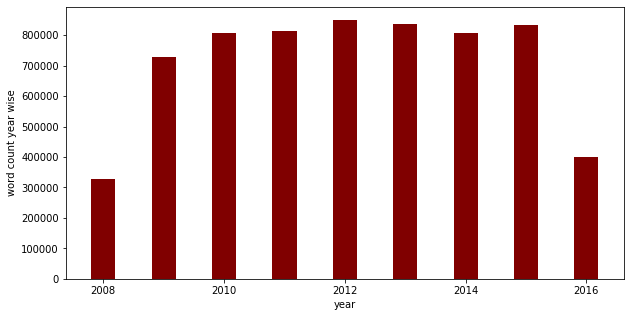

In [42]:
years = list(dic.keys())
counts = list(dic.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years, counts, color ='maroon',
        width = 0.4)

plt.xlabel("year")
plt.ylabel("word count year wise")
plt.show()